In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, datetime

In [2]:
start_date = '2014-05-31'
end_date = datetime.today()

In [3]:
df = yf.download('^GSPC',start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-23,5340.259766,5341.879883,5256.930176,5267.839844,5267.839844,3869520000
2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,5304.720215,3005510000
2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,5306.040039,3751540000
2024-05-29,5278.729980,5282.270020,5262.700195,5266.950195,5266.950195,3552750000
2024-05-30,5259.770020,5259.770020,5241.490234,5241.689941,5241.689941,460319840


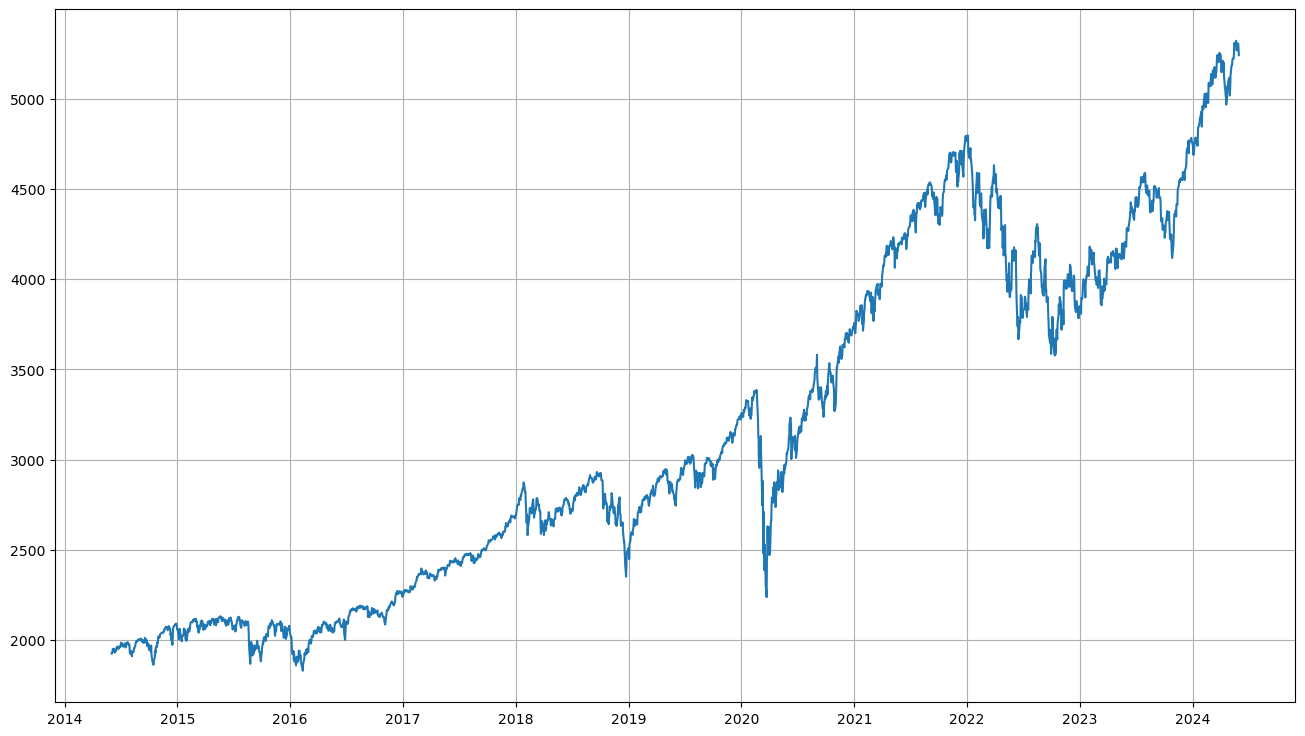

In [5]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Adj Close'])
plt.grid(True)

In [6]:
# train test split
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

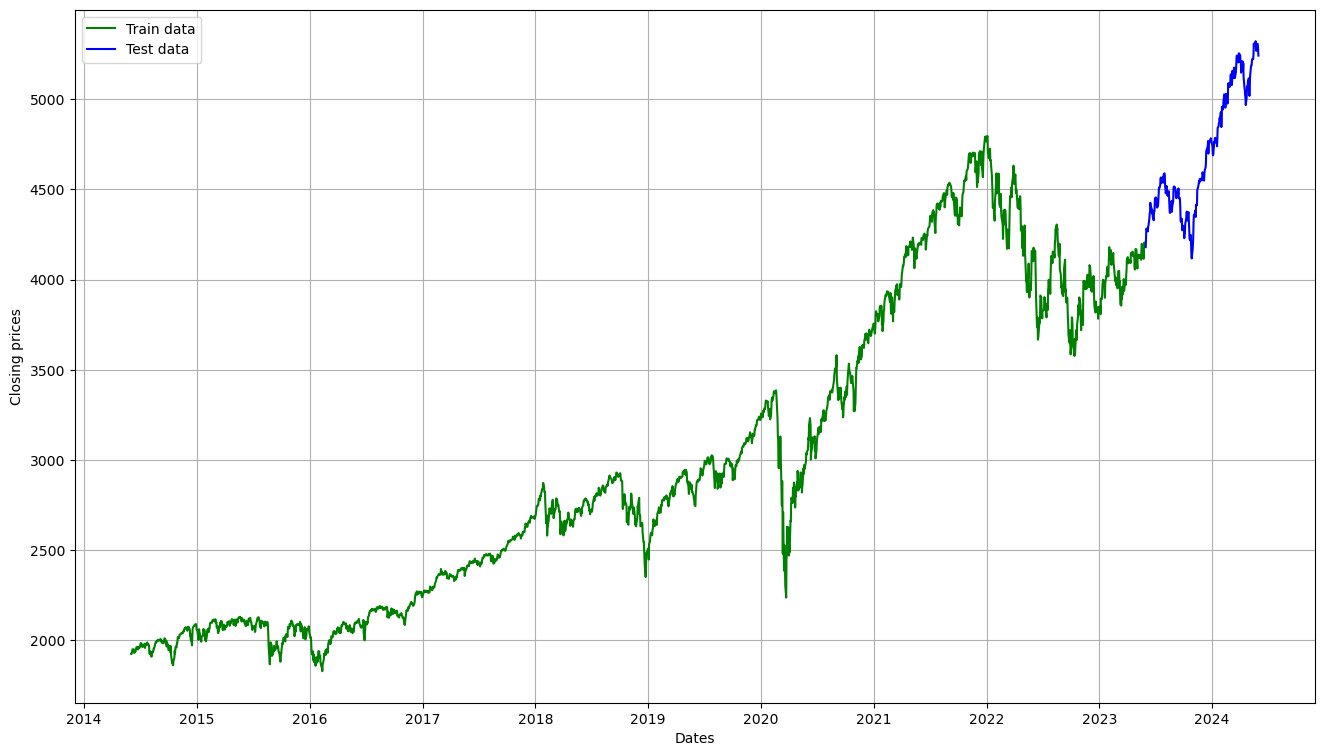

In [7]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()
plt.show()

In [9]:
model_predictions = []
n_test_obser = len(testing_data)


 Initialize the list for storing predictions
model_predictions = []

 Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(4,1,1))
model_fit = model.fit()

 Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data.append(actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(4,1,1))
    model_fit = model.fit()

#Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)
    

In [17]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assume training_data and testing_data are already defined
# and n_test_obser is the number of test observations
# Convert lists to numpy arrays if they are not already
training_data = np.array(training_data)
testing_data = np.array(testing_data)

# Initialize the list for storing predictions
model_predictions = []

# Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(2, 1, 1))
model_fit = model.fit()

# Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data = np.append(training_data, actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(2, 1, 1))
    model_fit = model.fit()

# Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)

In [18]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3021
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -15752.062
Date:                Thu, 30 May 2024   AIC                          31512.123
Time:                        17:15:25   BIC                          31536.175
Sample:                             0   HQIC                         31520.772
                               - 3021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9358      0.062    -15.163      0.000      -1.057      -0.815
ar.L2         -0.0664      0.014     -4.689      0.000      -0.094      -0.039
ma.L1          0.8924      0.065     13.696      0.0

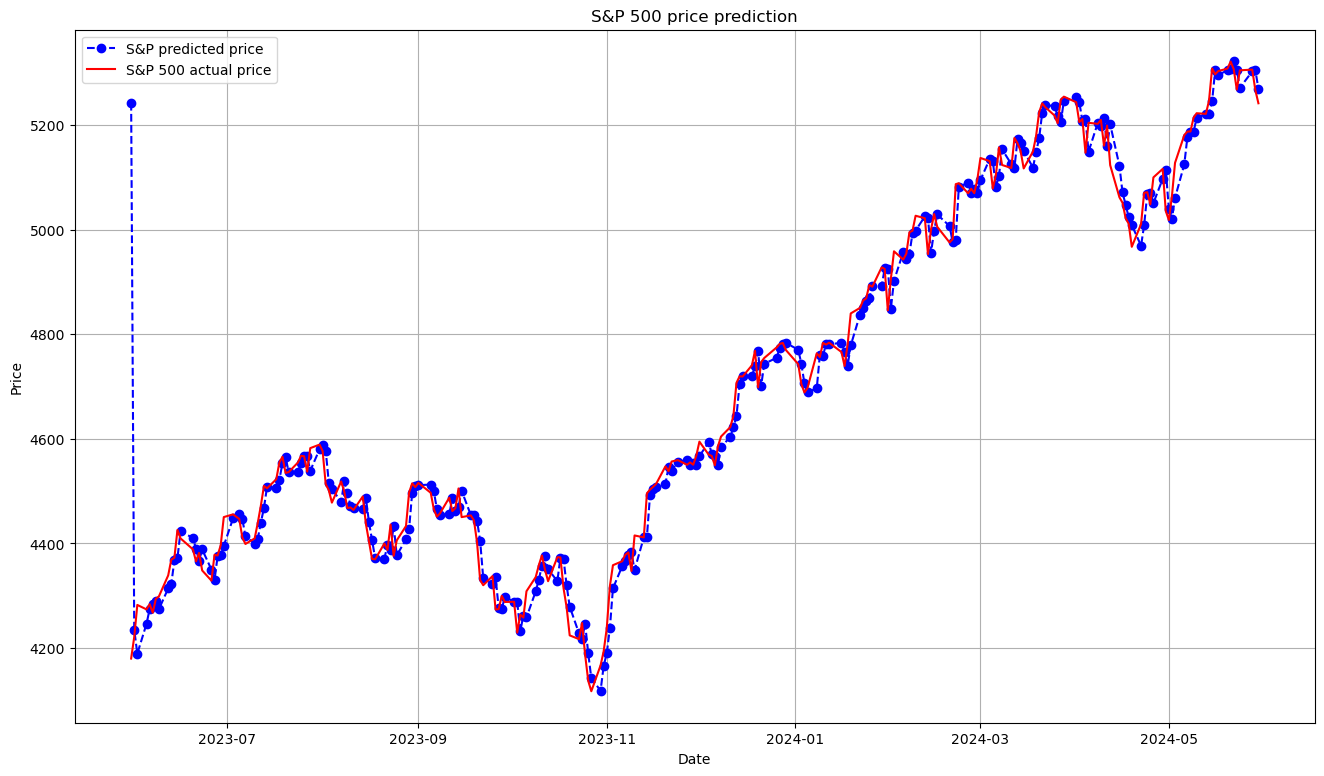

In [19]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'S&P predicted price' )
plt.plot(date_range, testing_data, color = 'red', label = 'S&P 500 actual price' )
plt.title('S&P 500 price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
model_predictions

array([5242.45286541, 4235.04209998, 4189.08929937, 4246.75203674,
       4274.65612829, 4283.20727052, 4288.97843542, 4274.33843895,
       4314.07196901, 4322.54795015, 4367.40455401, 4372.39372811,
       4423.14052866, 4410.47720546, 4389.75599685, 4366.85771763,
       4388.44187369, 4350.03878109, 4329.79095637, 4375.88809023,
       4376.93890716, 4395.43857561, 4447.89741244, 4455.93074428,
       4447.23421804, 4413.3688194 , 4399.57127819, 4408.99616133,
       4439.78907026, 4467.89034951, 4508.14211645, 4505.64297535,
       4521.90913365, 4553.41740186, 4565.22541517, 4536.41146021,
       4536.24187547, 4553.73608784, 4566.82303383, 4566.78723549,
       4538.87684469, 4579.98495275, 4588.61072395, 4577.34637491,
       4516.19378685, 4504.48855241, 4479.17730903, 4518.50793375,
       4497.34907826, 4472.43170645, 4466.82414419, 4465.99428519,
       4487.09037949, 4440.8717303 , 4406.9780253 , 4372.01676758,
       4370.68843893, 4397.50785705, 4388.00584492, 4434.16132

In [21]:
rmse = np.sqrt(mean_squared_error(model_predictions, testing_data))
rmse

75.15708998870714

In [22]:
model_predictions_2 = model_predictions[1:]

In [23]:
model_predictions_2

array([4235.04209998, 4189.08929937, 4246.75203674, 4274.65612829,
       4283.20727052, 4288.97843542, 4274.33843895, 4314.07196901,
       4322.54795015, 4367.40455401, 4372.39372811, 4423.14052866,
       4410.47720546, 4389.75599685, 4366.85771763, 4388.44187369,
       4350.03878109, 4329.79095637, 4375.88809023, 4376.93890716,
       4395.43857561, 4447.89741244, 4455.93074428, 4447.23421804,
       4413.3688194 , 4399.57127819, 4408.99616133, 4439.78907026,
       4467.89034951, 4508.14211645, 4505.64297535, 4521.90913365,
       4553.41740186, 4565.22541517, 4536.41146021, 4536.24187547,
       4553.73608784, 4566.82303383, 4566.78723549, 4538.87684469,
       4579.98495275, 4588.61072395, 4577.34637491, 4516.19378685,
       4504.48855241, 4479.17730903, 4518.50793375, 4497.34907826,
       4472.43170645, 4466.82414419, 4465.99428519, 4487.09037949,
       4440.8717303 , 4406.9780253 , 4372.01676758, 4370.68843893,
       4397.50785705, 4388.00584492, 4434.1613259 , 4377.37521

In [24]:
testing_data_2 = testing_data[1:]

In [25]:
rmse = np.sqrt(mean_squared_error(model_predictions_2, testing_data_2))
rmse

34.24059659145222